In [1]:
import pandas as pd
import datetime
import numpy as np
import math

import plotly.offline as py 
import plotly.graph_objs as go 

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.polynomial.polynomial import polyfit

import seaborn as sns

from sklearn import preprocessing

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
file_url="Telco.csv"

df=pd.read_csv(file_url)

In [3]:
df.sample(10)

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5942,7240-ETPTR,Germany,Female,0,Yes,No,9,No,No phone service,DSL,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,48.75,442.2,Yes
2172,1895-QTKDO,Germany,Female,0,No,No,1,Yes,No,DSL,...,No,No,No,No,Month-to-month,No,Credit card (automatic),43.95,43.95,No
6894,1400-MMYXY,Germany,Male,1,Yes,No,3,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
3768,3537-HPKQT,Germany,Female,0,Yes,No,55,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.4,No
585,5192-EBGOV,Germany,Female,1,No,No,1,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.70,85.7,Yes
1136,6621-NRZAK,Germany,Female,0,Yes,Yes,63,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.00,1209.25,No
532,4234-XTNEA,Germany,Male,0,No,No,2,Yes,No,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.95,174.45,No
1240,2120-SMPEX,Germany,Male,0,No,No,25,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.15,536.35,No
2652,4727-MCYZG,Germany,Male,0,No,No,1,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,55.55,55.55,No
2109,3521-HTQTV,Germany,Male,0,No,No,34,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),26.10,980.35,No


In [ ]:
#Problem 1

In [20]:
df_churn=df[df["Churn"]=="Yes"]

len(df_churn)/len(df)

0.2653698707936959

In [ ]:
#Problem 2

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Problem3

In [204]:
df_female_senior=df[(df["gender"]=='Female') & (df["SeniorCitizen"]==True)]
len(df_female_senior)

568

In [206]:
df_female_senior_fiber=df_female_senior[df_female_senior["InternetService"]=="Fiber optic"]
len(df_female_senior_fiber)

424

In [207]:
df_female_senior_dsl=df_female_senior[df_female_senior["InternetService"]=="DSL"]
len(df_female_senior_dsl)

123

In [209]:
df_female_senior_fiber_churn=df_female_senior_fiber[df["Churn"]=='Yes']
len(df_female_senior_fiber_churn)

C:\Users\vjib\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



199

In [210]:
df_female_senior_dsl_churn=df_female_senior_dsl[df["Churn"]=='Yes']
len(df_female_senior_dsl_churn)

C:\Users\vjib\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



38

In [220]:
churn_rate_female_senior_fiber=len(df_female_senior_fiber_churn)/len(df_female_senior_fiber)
churn_rate_female_dsl_fiber=len(df_female_senior_dsl_churn)/len(df_female_senior_dsl)

churn_rate_female_senior_fiber,churn_rate_female_dsl_fiber,(churn_rate_female_senior_fiber-churn_rate_female_dsl_fiber)

(0.4693396226415094, 0.3089430894308943, 0.1603965332106151)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



Text(0.5, 1.0, 'Churn rate of Female Senior citizen by internet service types')

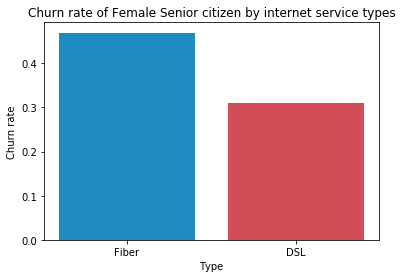

In [287]:
plt.bar(["Fiber","DSL"],[churn_rate_female_senior_fiber,churn_rate_female_dsl_fiber],color=['#1E8BC3','#d24d57'])
ax = plt.subplot()
ax.set_xlabel('Type')
ax.set_ylabel('Churn rate')
plt.title('Churn rate of Female Senior citizen by internet service types')

In [ ]:
#Problem4

In [30]:
df_fiber_phone=df[(df["PhoneService"]=="No") & (df["InternetService"]=="Fiber optic")]

len(df_fiber_phone)

0

In [ ]:
#Problem5

In [11]:
df_count=df[(df["PhoneService"]=="Yes") & (df["TechSupport"]=="Yes")]
len(df_count)

1755

In [12]:
df_count=df[(df["MultipleLines"]=="Yes") & (df["TechSupport"]=="Yes")]
len(df_count)

1021

In [13]:
df_count=df[(df["InternetService"]!="No") & (df["TechSupport"]=="Yes")]
len(df_count)

2044

In [14]:
df_count=df[(df["OnlineSecurity"]=="Yes") & (df["TechSupport"]=="Yes")]
len(df_count)

1099

In [15]:
df_count=df[(df["OnlineBackup"]=="Yes") & (df["TechSupport"]=="Yes")]
len(df_count)

1152

In [16]:
df_count=df[(df["DeviceProtection"]=="Yes") & (df["TechSupport"]=="Yes")]
len(df_count)

1209

In [17]:
df_count=df[(df["StreamingTV"]=="Yes") & (df["TechSupport"]=="Yes")]
len(df_count)

1218

In [18]:
df_count=df[(df["StreamingMovies"]=="Yes") & (df["TechSupport"]=="Yes")]
len(df_count)

1228

In [19]:
#Problem6

In [19]:
churn_rate={}
churn_yes={}
churn_no={}

x_charge=[]
y_rate=[]

for index,row in df.iterrows():
    monthly_charge=row['MonthlyCharges']
    churn=row['Churn']
    
    charge=int(monthly_charge/1)*1
        
    if not charge in churn_yes:
        churn_yes[charge]=0
        
    if not charge in churn_no:
        churn_no[charge]=0
        
    if churn=="Yes":
        churn_yes[charge]+=1
    else:
        churn_no[charge]+=1
        
for charge,total in churn_yes.items():
    rate=churn_yes[charge]/(churn_yes[charge]+churn_no[charge])
    churn_rate[charge]=rate
    x_charge.append([1,charge])
    y_rate.append(rate)

In [20]:
m,b = np.polyfit(list(churn_rate.keys()),list(churn_rate.values()), 1)
m,b

(0.0009118276153516028, 0.19967003593617524)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



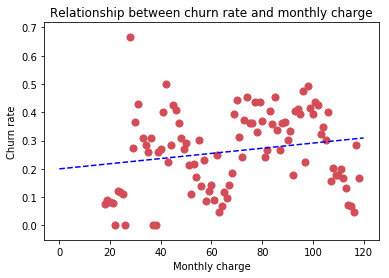

In [23]:
plt.scatter(churn_rate.keys(),churn_rate.values(),color='#d24d57',s=50)
ax = plt.subplot()
ax.set_xlabel('Monthly charge')
ax.set_ylabel('Churn rate')
plt.title('Relationship between churn rate and monthly charge')

x = np.linspace(0, 120, 10)
plt.plot(x,  m*x+b, linestyle='dashed',color="blue")

In [24]:
import statsmodels.api as sm
ols = sm.OLS(y_rate, x_charge)
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.645
Date:                Thu, 23 Jan 2020   Prob (F-statistic):             0.0592
Time:                        19:38:00   Log-Likelihood:                 57.002
No. Observations:                  99   AIC:                            -110.0
Df Residuals:                      97   BIC:                            -104.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1997      0.036      5.603      0.000       0.129       0.270
x1             0.0009      0.000      1.909      0.059   -3.61e-05       0.002
==============================================================================
Omnibus:                        0.525   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.769   Jarque-Bera (JB):                0.672
Skew:                           0.133   Prob(JB):                        0.715
Kurtosis:                       2.697   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Problem7

In [25]:
df_online_yes=df[df["OnlineBackup"]=="Yes"]
df_online_no=df[df["OnlineBackup"]=="No"]
df_online_yes_churn=df_online_yes[df_online_yes["Churn"]=="Yes"]
df_online_no_churn=df_online_no[df_online_no["Churn"]=="Yes"]

online_yes_churn_rate=len(df_online_yes_churn)/len(df_online_yes)
online_no_churn_rate=len(df_online_no_churn)/len(df_online_no)

print(online_yes_churn_rate,online_no_churn_rate)

0.21531494442157267 0.39928756476683935


In [26]:
df_security_yes=df[df["OnlineSecurity"]=="Yes"]
df_security_no=df[df["OnlineSecurity"]=="No"]
df_security_yes_churn=df_security_yes[df_security_yes["Churn"]=="Yes"]
df_security_no_churn=df_security_no[df_security_no["Churn"]=="Yes"]

security_yes_churn_rate=len(df_security_yes_churn)/len(df_security_yes)
security_no_churn_rate=len(df_security_no_churn)/len(df_security_no)

print(security_yes_churn_rate,security_no_churn_rate)

0.14611193660227836 0.4176672384219554


In [27]:
df_tech_yes=df[df["TechSupport"]=="Yes"]
df_tech_no=df[df["TechSupport"]=="No"]
df_tech_yes_churn=df_tech_yes[df_tech_yes["Churn"]=="Yes"]
df_tech_no_churn=df_tech_no[df_tech_no["Churn"]=="Yes"]

tech_yes_churn_rate=len(df_tech_yes_churn)/len(df_tech_yes)
tech_no_churn_rate=len(df_tech_no_churn)/len(df_tech_no)

print(tech_yes_churn_rate,tech_no_churn_rate)

0.15166340508806261 0.4163547365390153


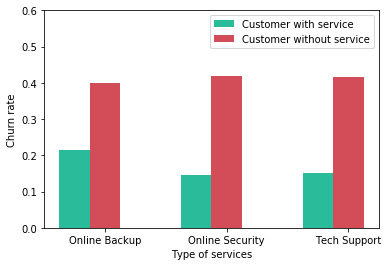

In [30]:
x_axis=["Online Backup","Online Security","Tech Support"]
yes_service_rates = [online_yes_churn_rate,security_yes_churn_rate,tech_yes_churn_rate]
no_service_rates = [online_no_churn_rate,security_no_churn_rate,tech_no_churn_rate]

barWidth = 0.25

r1 = np.arange(3)
r2 = [x + barWidth for x in r1]

plt.bar(r1, yes_service_rates, width=barWidth, color='#2abb9b', align='center',label='Customer with service')
plt.bar(r2, no_service_rates, width=barWidth, color='#d24d57', align='center',label='Customer without service')

axes = plt.gca()
axes.set_ylim([0,0.6])

plt.xlabel('Type of services')
plt.ylabel('Churn rate')
plt.xticks([r + barWidth for r in range(3)],x_axis)

plt.legend()
plt.show()

In [ ]:
#Problem8

In [32]:
df_with_partner=df[df["Partner"]=="Yes"]
df_without_partner=df[df["Partner"]=="No"]

df_churn_with_partner=df[df["Churn"]=="Yes"]
df_churn_without_partner=df[df["Churn"]=="Yes"]

churn_rate_with_partner=len(df_churn_with_partner)/len(df_with_partner)
churn_rate_without_partner=len(df_churn_without_partner)/len(df_without_partner)

churn_rate_with_partner,churn_rate_without_partner

(0.5493827160493827, 0.5133205163416644)

C:\Users\vjib\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning:


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



Text(0.5, 1.0, 'Churn rate by status')

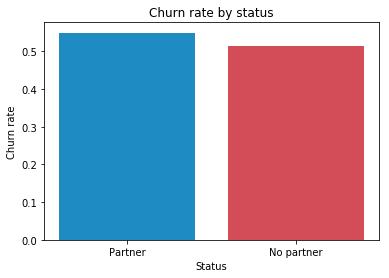

In [33]:
plt.bar(["Partner","No partner"],[churn_rate_with_partner,churn_rate_without_partner],color=['#1E8BC3','#d24d57'])
ax = plt.subplot()
ax.set_xlabel('Status')
ax.set_ylabel('Churn rate')
plt.title('Churn rate by status')

In [ ]:
#Problem9

In [301]:
serviceDict={}
serviceDict['PhoneService']=[]
serviceDict['MultipleLines']=[]
serviceDict['InternetService']=[]
serviceDict['OnlineSecurity']=[]
serviceDict['OnlineBackup']=[]
serviceDict['DeviceProtection']=[]
serviceDict['TechSupport']=[]
serviceDict['StreamingTV']=[]
serviceDict['StreamingMovies']=[]
serviceDict['Churn']=[]

for index,row in df.iterrows():
        
    phone_service=row['PhoneService']
    multiple_line=row['MultipleLines']
    internet_service=row['InternetService']
    online_security=row['OnlineSecurity']
    online_backup=row['OnlineBackup']
    device_protection=row['DeviceProtection']
    tech_support=row['TechSupport']
    streamingTV=row['StreamingTV']
    streamingMovies=row['StreamingMovies']
    churn=row["Churn"]
    
    if phone_service=="Yes":
        serviceDict['PhoneService'].append(1)
    else:
        serviceDict['PhoneService'].append(0)
        
    if multiple_line=="Yes":
        serviceDict['MultipleLines'].append(1)
    else:
        serviceDict['MultipleLines'].append(0)
        
    if internet_service!="No":
        serviceDict['InternetService'].append(1)
    else:
        serviceDict['InternetService'].append(0)
        
    if online_security=="Yes":
        serviceDict['OnlineSecurity'].append(1)
    else:
        serviceDict['OnlineSecurity'].append(0)
        
    if online_backup=="Yes":
        serviceDict['OnlineBackup'].append(1)
    else:
        serviceDict['OnlineBackup'].append(0)
        
    if device_protection=="Yes":
        serviceDict['DeviceProtection'].append(1)
    else:
        serviceDict['DeviceProtection'].append(0)
        
    if tech_support=="Yes":
        serviceDict['TechSupport'].append(1)
    else:
        serviceDict['TechSupport'].append(0)
        
    if streamingTV=="Yes":
        serviceDict['StreamingTV'].append(1)
    else:
        serviceDict['StreamingTV'].append(0)
        
    if streamingMovies=="Yes":
        serviceDict['StreamingMovies'].append(1)
    else:
        serviceDict['StreamingMovies'].append(0)
        
    if churn=="Yes":
        serviceDict["Churn"].append(1)
    else:
        serviceDict["Churn"].append(0)

In [302]:
df_service = pd.DataFrame(serviceDict) 
df_service.sample(5)

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
3110,1,0,0,0,0,0,0,0,0,0
4151,0,0,1,0,1,1,0,1,1,0
2907,1,0,1,0,0,0,0,1,1,1
1107,1,1,0,0,0,0,0,0,0,0
5957,1,0,1,0,0,0,0,0,1,1


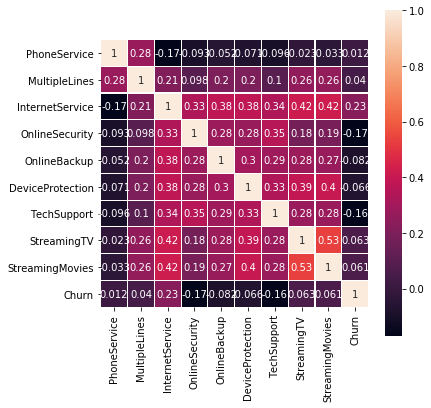

In [303]:
plt.figure(figsize=(6,6))
sns.heatmap(df_service.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [ ]:
#Problem 10

In [22]:
inputs=[]
outputs=[]

for index,row in df.iterrows():
    
    temp_input=[0]*25
    
    region=row['Region']
    gender=row['gender']
    senior=row['SeniorCitizen']
    partner=row['Partner']
    dependent=row['Dependents']
    tenure=row['tenure']
    phone_service=row['PhoneService']
    multiple_line=row['MultipleLines']
    internet_service=row['InternetService']
    online_security=row['OnlineSecurity']
    online_backup=row['OnlineBackup']
    device_protection=row['DeviceProtection']
    tech_support=row['TechSupport']
    streamingTV=row['StreamingTV']
    streamingMovies=row['StreamingMovies']
    contact=row['Contract']
    paperless=row['PaperlessBilling']
    paymentMethod=row['PaymentMethod']
    charge=row["MonthlyCharges"]
    churn=row["Churn"]
    
    if region=='England':
        temp_input[0]=1
    elif region=='France':
        temp_input[1]=1
    else:
        temp_input[2]=1
    
    if gender=='Male':
        temp_input[3]=1
    
    temp_input[4]=senior
    
    if partner=='Yes':
        temp_input[5]=1
    
    if dependent=='Yes':
        temp_input[6]=1
        
    temp_input[7]=tenure/72
    
    if phone_service=="Yes":
        temp_input[8]=1
        
    if multiple_line=="Yes":
        temp_input[9]
        
    if internet_service=="DSL":
        temp_input[10]=1
    elif internet_service=="Fiber optic":
        temp_input[11]=1
        
    if online_security=="Yes":
        temp_input[12]=1
        
    if online_backup=="Yes":
        temp_input[13]=1
        
    if device_protection=="Yes":
        temp_input[14]=1
        
    if tech_support=="Yes":
        temp_input[15]=1
        
    if streamingTV=="Yes":
        temp_input[16]=1
        
    if streamingMovies=="Yes":
        temp_input[17]=1
        
    if contact=='One year':
        temp_input[18]=1
    elif contact=='Two year':
        temp_input[18]=2
    else:
        temp_input[18]=1/12
        
    if paperless=='Yes':
        temp_input[19]=1
        
    if paymentMethod=="Bank transfer (automatic)":
        temp_input[20]=1
    elif paymentMethod=="Credit card (automatic)":
        temp_input[21]=1
    elif paymentMethod=="Electronic check":
        temp_input[22]=1
    else:
        temp_input[23]=1
        
    temp_input[24]=charge/118.75
    
    inputs.append(temp_input)
    
    if churn=='Yes':
        outputs.append([1])
    else:
        outputs.append([0])

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(inputs, outputs)
clf.score(inputs, outputs)

C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\vjib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.8046287093568082

In [24]:
clf.coef_

#4-tenure
#5-phone_service
#15-Contact

array([[-0.2989531 , -0.19974971, -0.13707681, -0.0239116 ,  0.22443007,
        -0.00293611, -0.17187512, -2.28390509, -0.68000393,  0.        ,
         0.4642555 ,  1.06972062, -0.42802417, -0.17650227, -0.06983401,
        -0.40189543,  0.14098355,  0.15429337, -0.7382749 ,  0.34442834,
        -0.21474113, -0.29986621,  0.10522562, -0.22639791,  1.57889572]])